In [41]:
import pandas as pd
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error, r2_score

In [2]:
df = pd.read_csv('Student Scores.csv')

df.head()

,Puntaje Anterior,Horas de Sueno,Examenes de Practica,Delegacion,Beca,Puntaje Final
0,79.967142,7.522429,2,Xochimilco,Si,55.581794
1,73.617357,7.424985,5,Coyoacan,No,68.827108
2,81.476885,5.595220,3,Iztapalapa,No,46.711597
3,90.230299,7.869376,3,Iztapalapa,No,73.924212
4,72.658466,4.764876,4,Xochimilco,Si,64.461809


Para convertir el vocabulario a numérico, usaremos one-hot encoding. 

Aquí, como en PLN, las columnas marcan cada palabra en el vocabulario, y el renglón marca si se da en el documento o no.

Sin embargo, necesitamos evitar caer en la encoding trap y tiraremos una de las columnas del total porque con base en el resto se puede representar todo el vocabulario.

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 6 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Puntaje Anterior      20000 non-null  float64
 1   Horas de Sueno        20000 non-null  float64
 2   Examenes de Practica  20000 non-null  int64  
 3   Delegacion            20000 non-null  object 
 4   Beca                  20000 non-null  object 
 5   Puntaje Final         20000 non-null  float64
dtypes: float64(3), int64(1), object(2)
memory usage: 937.6+ KB


In [4]:
df.describe()

,Puntaje Anterior,Horas de Sueno,Examenes de Practica,Puntaje Final
count,20000.000000,20000.000000,20000.000000,20000.000000
mean,75.035113,6.984854,4.529400,69.888267
std,9.960723,1.496505,2.889075,17.696941
min,35.775997,0.301594,0.000000,17.290977
25%,68.337232,5.952116,2.000000,56.677445
50%,75.077005,6.989149,5.000000,70.251305
75%,81.819069,8.007413,7.000000,83.383641
max,100.000000,12.000000,9.000000,100.000000


<Axes: ylabel='Puntaje Final'>

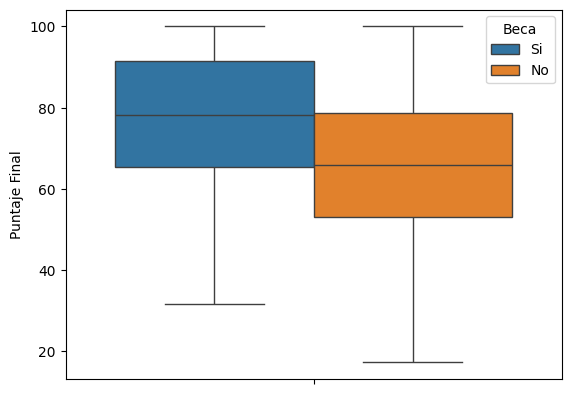

In [5]:
sns.boxplot(df, y='Puntaje Final', hue='Beca')

<Axes: ylabel='Puntaje Final'>

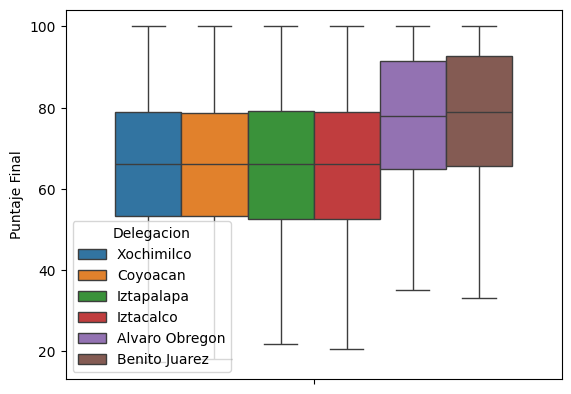

In [6]:
sns.boxplot(df, y='Puntaje Final', hue='Delegacion')

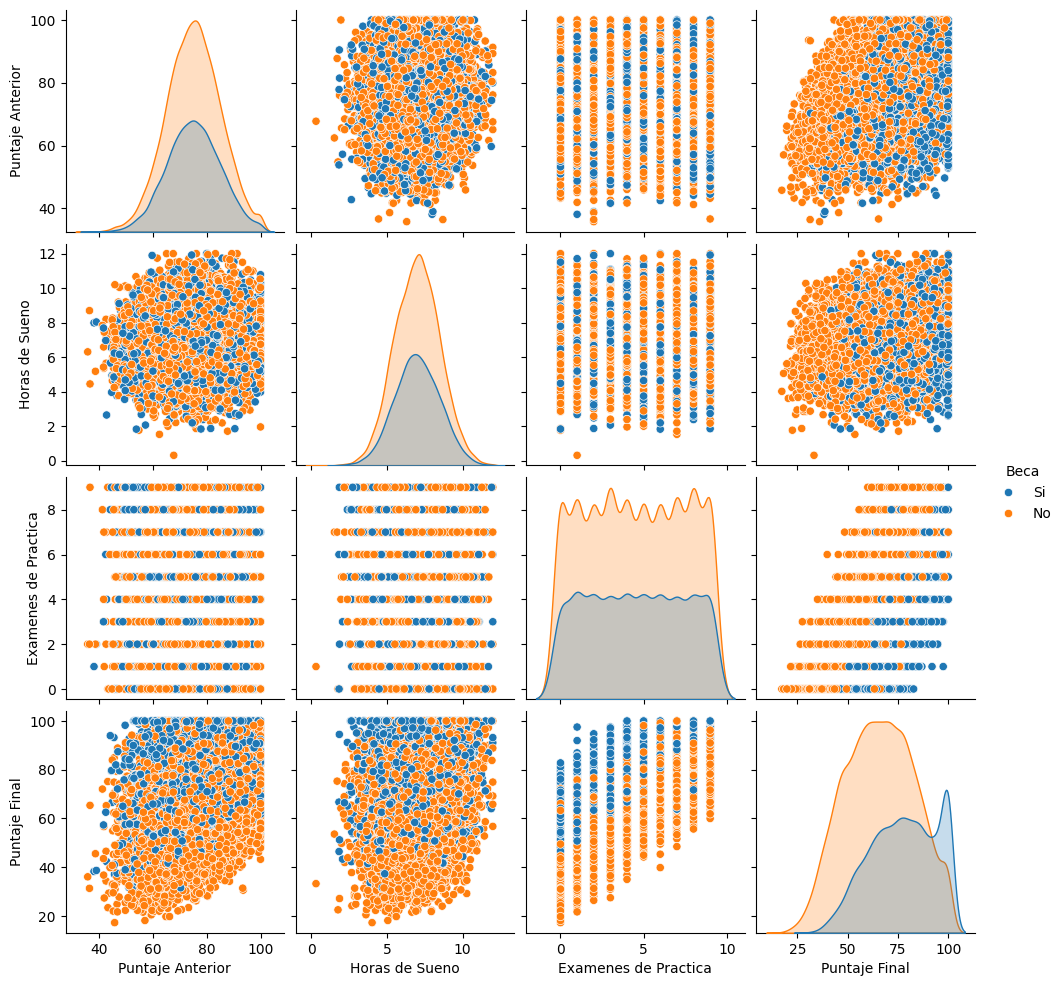

In [7]:
sns.pairplot(df, hue='Beca')

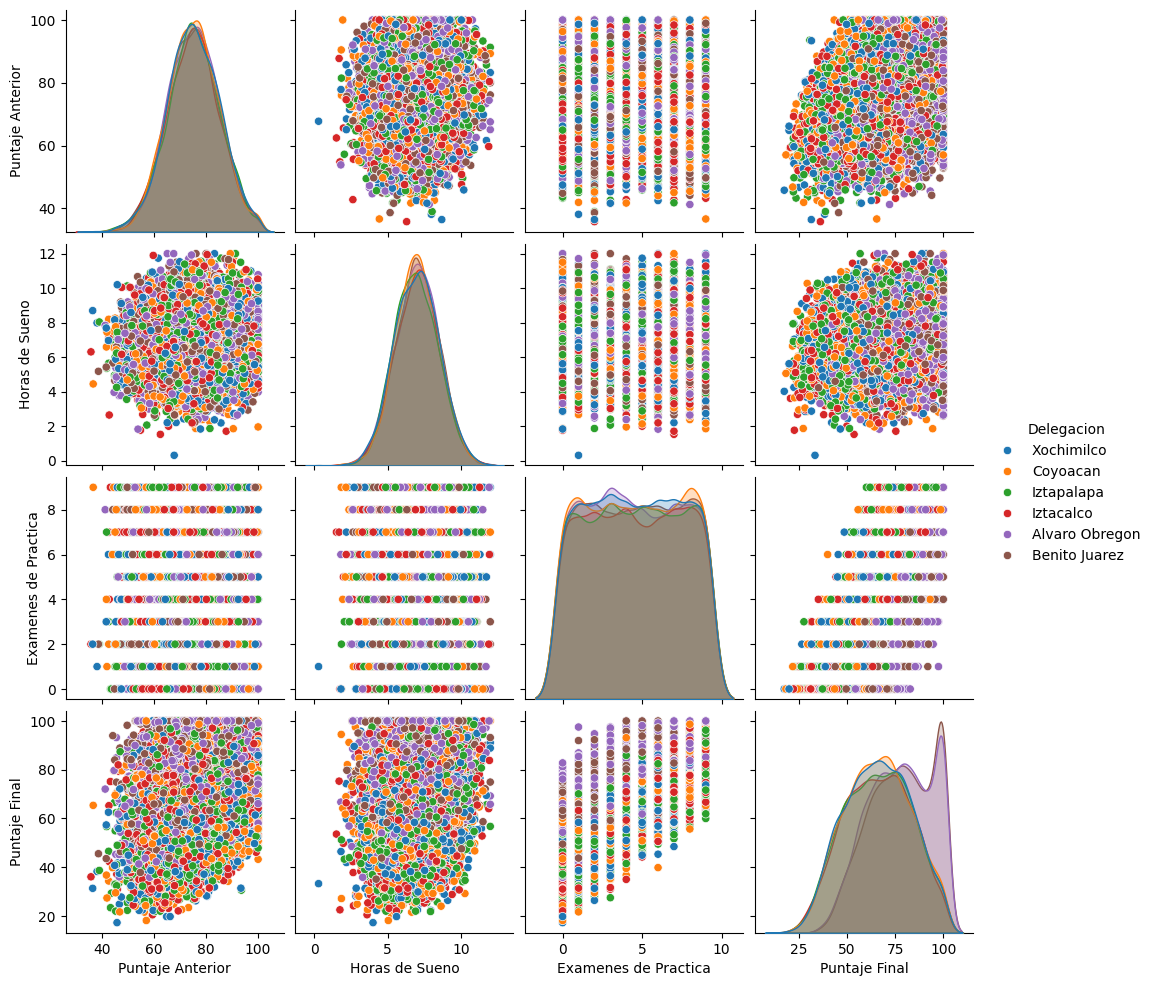

In [8]:
sns.pairplot(df, hue='Delegacion')

<Axes: xlabel='Delegacion'>

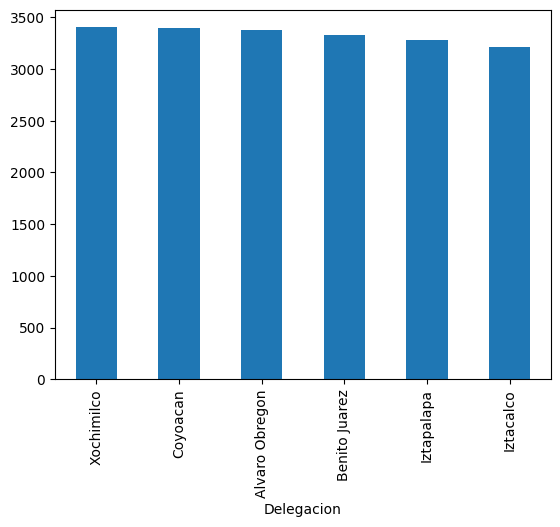

In [9]:
df['Delegacion'].value_counts().plot(kind='bar')

In [10]:
import plotly_express as px
px.scatter(df, x='Puntaje Anterior', y='Puntaje Final', color='Delegacion')

<Axes: >

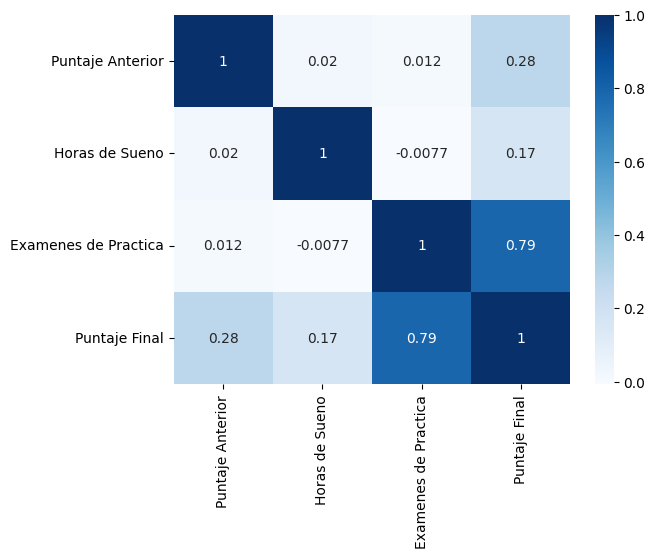

In [22]:
numerical_features = df.select_dtypes(include = ['float64', 'int64']).columns.tolist()
cor_matrix = df[numerical_features].corr()
sns.heatmap(cor_matrix, annot=True, cmap = 'Blues')

In [18]:
numerical_features.tolist()

['Puntaje Anterior', 'Horas de Sueno', 'Examenes de Practica', 'Puntaje Final']

In [13]:
#Definir quien es X quien es y
X = df.drop('Puntaje Final', axis = 1)
y = df['Puntaje Final']

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, random_state = 42)

In [16]:
df.columns.tolist()

['Puntaje Anterior',
 'Horas de Sueno',
 'Examenes de Practica',
 'Delegacion',
 'Beca',
 'Puntaje Final']

In [59]:
# Dividimos las categorías de numeros
numerical_features = df.select_dtypes(include = ['float64', 'int64']).columns.tolist()[:-1]

categorical_features = df.select_dtypes(include = ['object']).columns.tolist()

# Instanciar el escalador
numerical_transformer = StandardScaler()

# instanciar el codificador one-hot
categorical_transformer = OneHotEncoder(drop='first')

In [60]:
preprocesor = ColumnTransformer(
    transformers = [
        ('num', numerical_transformer, numerical_features),
        ('cat', categorical_transformer, categorical_features)
    ]
)

model = Pipeline(
    steps = [
        ('preprocesor', preprocesor),
        ('regresor', LinearRegression())
    ]
)

In [61]:
model.fit(X_train, y_train)

Pipeline(steps=[('preprocesor',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  ['Puntaje Anterior',
                                                   'Horas de Sueno',
                                                   'Examenes de Practica']),
                                                 ('cat',
                                                  OneHotEncoder(drop='first'),
                                                  ['Delegacion', 'Beca'])])),
                ('regresor', LinearRegression())])

In [62]:
y_pred = model.predict(X_test)
print(f'''
Metrics:
RMSE: {np.sqrt(mean_squared_error(y_pred, y_test))},
MSE: {mean_squared_error(y_pred, y_test)}
R2: {r2_score(y_test, y_pred)}
''')


Metrics:
RMSE: 4.974888630504598,
MSE: 24.74951688592391
R2: 0.9214170074866093



In [67]:
esdudiante_nuevo = pd.DataFrame(
    {
        'Puntaje Anterior': [78.5],
        'Horas de Sueno': [8],
        'Examenes de Practica':[5],
        'Delegacion': ['Iztapalapa'],
        'Beca':['No']
    }
)

In [68]:
model.predict(esdudiante_nuevo)

array([67.90107257])